In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer


In [21]:
# load the product data
products = pd.read_csv('BigBasket Products.csv')

print(products.columns)

print(products.head())

Index(['index', 'product_id', 'product_name', 'category', 'sub_category',
       'brand', 'sale_price', 'market_price', 'type', 'user_id', 'rating',
       'description'],
      dtype='object')
   index  product_id                                       product_name  \
0      1      100001             Garlic Oil - Vegetarian Capsule 500 mg   
1      2      100002                              Water Bottle - Orange   
2      3      100003                     Brass Angle Deep - Plain, No.2   
3      4      100004  Cereal Flip Lid Container/Storage Jar - Assort...   
4      5      100005                 Creme Soft Soap - For Hands & Body   

                 category           sub_category              brand  \
0        Beauty & Hygiene              Hair Care  Sri Sri Ayurveda    
1  Kitchen, Garden & Pets  Storage & Accessories         Mastercook   
2    Cleaning & Household            Pooja Needs                Trm   
3    Cleaning & Household   Bins & Bathroom Ware             Nakoda   


In [3]:
# # apply K-Means clustering
# kmeans = KMeans(n_clusters=5, random_state=0)
# kmeans.fit(X_scaled)


In [4]:
# preprocess the data
X = products[['product_id','category', 'sale_price', 'rating']]
X['category'] = X['category'].astype('category').cat.codes # convert categorical variable to numerical
X_scaled = (X - X.mean()) / X.std() # standardize the data


print(X)

       product_id  category  sale_price  rating
0          100001         2      220.00     4.1
1          100002         9      180.00     2.3
2          100003         4      119.00     3.4
3          100004         4      149.00     3.7
4          100005         2      162.00     4.4
...           ...       ...         ...     ...
27550      127551         2      199.20     3.9
27551      127552         8       67.50     4.0
27552      127553         8      200.00     3.8
27553      127554         3      396.00     4.2
27554      127555         2      214.53     4.5

[27555 rows x 4 columns]


C:\Users\91638\AppData\Local\Temp\ipykernel_22392\3756812260.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['category'] = X['category'].astype('category').cat.codes # convert categorical variable to numerical


In [5]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [23]:
kmeans = KMeans(n_clusters=12, random_state=0)
kmeans.fit(X_imputed)


# get the cluster labels
labels = kmeans.labels_
print(labels)

C:\Users\91638\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[10 10 10 ...  8  8  8]


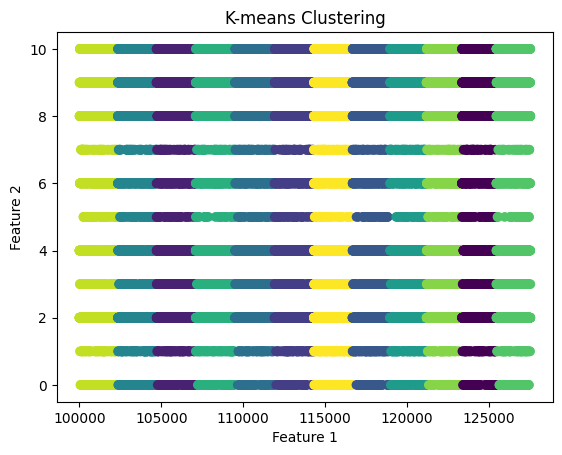

In [24]:
import matplotlib.pyplot as plt

# plot the data points with their assigned cluster labels
plt.scatter(X_imputed[:, 0], X_imputed[:, 1], c=labels)
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [25]:
def recommend_products(product_id):
    product_cluster = labels[products.index[products['product_id'] == product_id].tolist()[0]]
    similar_products = products[labels == product_cluster].sort_values(by=['rating'], ascending=False)[:5]
    return similar_products

# example usage
recommend_products(116607)

,index,product_id,product_name,category,sub_category,brand,sale_price,market_price,type,user_id,rating,description
16531,16532,116532,Cocoa Heaven Mug Cake Mix,Gourmet & World Food,Cooking & Baking Needs,Serapheena,67.15,79.0,"Baking, Cake Decorations",96970,5.0,The Cocoa Heaven cake mix is made from ancient...
15608,15609,115609,MaxFresh Blue Spicy Fresh Gel Toothpaste - Del...,Beauty & Hygiene,Oral Care,Colgate,89.25,105.0,Toothpaste,136426,5.0,Don’t let the trolls get you down. #MaxFreshTh...
15556,15557,115557,Stroke Tall Juice & Water Glass/Tumbler,"Kitchen, Garden & Pets",Crockery & Cutlery,Hi-Luxe,995.00,995.0,Glassware,126541,5.0,Hi luxe products are made of soda-lime glasswa...
14613,14614,114614,Premium Soft Diaper Pants - Small Size,Baby Care,Diapers & Wipes,Huggies,718.92,798.0,Diapers,152082,5.0,Our softest for your softest. Introducing the ...
14616,14617,114617,Black Pearl Shampoo - Hair Loss & Dandruff Con...,Beauty & Hygiene,Hair Care,Jiva Ayurveda,120.00,120.0,Shampoo & Conditioner,154730,5.0,Jiva Black Pearl Shampoo is the right shampoo ...
